# PATIENT FALL RISK ASSESSMENT PROJECT

## Background


The clinic's director seeks to improve patient safety and reduce fall-related incidents. Falls among patients pose a significant risk, leading to severe health complications and increased healthcare costs. To address this issue, a data-driven assessment is required to better understand the factors contributing to falls and to develop predictive measures for mitigating them effectively.

The dataset used for this analysis consists of patient-related information, categorized into two types:

 - Medical Data: Collected upon patient admission and during patient stay, this dataset includes age, gender, diagnosis, and procedure. This data is always available for every patient.

 - Nursing Data: The remaining variables in this dataset come from the so-called fall risk assessment. This assessment is conducted by nurses and contains various risk factors that are assumed to contribute to patient falls. Unlike medical data, nursing data is manually recorded and is only collected for specific patients—namely, those deemed at an increased risk of falling or those who exceed a certain age threshold. From these variables also the variable fall risk is derived, that is the traditional nursing assessment of a patient’s fall risk.

Our task is to conduct a predictive analytics project with two main objectives:

1) Develop a reliable assessment of the risk of patient falls based on historical data.

2) Identify key factors that contribute to fall incidents.

## Section 1: Data Overview and Preparation

In this section, we:
 - Provide a clear and intuitive summary of the dataset.

 - Define an approach to identify outliers and implement an appropriate method to handle them.

 - Identify and assess missing data. Define an approach to handle the missing data.

 - Establish an appropriate strategy for partitioning training and testing datasets


### Import Necessary Libraries for the entire Notebook

In [ ]:
# Installations

# %pip install autoviz
# %pip install miceforest
# %pip install prince
# %pip install gower
# %pip install shap
# %pip install imblearn

In [97]:
import pandas as pd
# %pip install autoviz
#from autoviz.AutoViz_Class import AutoViz_Class
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.metrics import (
     accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve
 )
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
     precision_recall_curve, roc_auc_score, confusion_matrix, classification_report, auc
 )

import xgboost as xgb
import shap
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import shap
import prince
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [98]:
pd.set_option('display.max_rows', 200)

### 1. SUMMARY OF THE DATASET

In [99]:
pwd()

'c:\\Users\\felix\\OneDrive\\Dokumente\\FU_Working\\ApplAna\\FallPredictionUV\\repos\\Applied-Analytics-Portfolio'

In [100]:
# Load the dataset
path = "C:\\Users\\felix\\OneDrive\\Dokumente\\FU_Working\\ApplAna\\FallPredictionUV\\kip_sdm_syn.csv"
df = pd.read_csv(path, sep=",")

#### Shape and Data Types

In [101]:
print("Number of rows and columns:", df.shape)
print("\nData Types:\n", df.dtypes.value_counts())
print("\nColumn Names:\n", df.columns.tolist())

Number of rows and columns: (40000, 45)

Data Types:
 object     23
bool       19
int64       2
float64     1
Name: count, dtype: int64

Column Names:
 ['fallen', 'id', 'age', 'procedure', 'diagnosis', 'c_zriserh1', 'decubitus-admission', 'decubitus-at_the_moment', 'bed_mobility-impairment', 'bed_mobility-jones', 'bed_mobility-skin_condition', 'transfer-impairment', 'transfer', 'medical_items', 'medical_items-arm_or_leg_splint', 'medical_items-A_V_system', 'medical_items-plaster_or_neck_brace', 'medical_items-compression_stocking', 'medical_items-ventilation_mask', 'medical_items-O2_glasses', 'medical_items-orthesis', 'medical_items-prosthesis', 'medical_items-skin_condition_at_item_application', 'fall-last_12_month', 'fall-how_many_last_12_month', 'fall-while_stay', 'fall-while_transfer', 'walk-impairment', 'walk-jones', 'walk-balance_and_gait_impaired', 'walking_aid', 'excretions-impairment', 'excretions-incontinence', 'excretions-nykturie', 'cognition-impairment', 'cognition-disorie

In [102]:
# List all variable names and their data types
print("\nVariable names and their data types:")
print(df.dtypes)  # Displays column names with their data types


Variable names and their data types:
fallen                                                 bool
id                                                    int64
age                                                   int64
procedure                                            object
diagnosis                                            object
c_zriserh1                                             bool
decubitus-admission                                  object
decubitus-at_the_moment                              object
bed_mobility-impairment                              object
bed_mobility-jones                                   object
bed_mobility-skin_condition                          object
transfer-impairment                                  object
transfer                                             object
medical_items                                        object
medical_items-arm_or_leg_splint                        bool
medical_items-A_V_system                               bool
me

In [103]:
unique_counts = df.nunique()
print(unique_counts)

fallen                                                  2
id                                                  38226
age                                                    84
procedure                                             209
diagnosis                                            3345
c_zriserh1                                              2
decubitus-admission                                     1
decubitus-at_the_moment                                 2
bed_mobility-impairment                                 2
bed_mobility-jones                                      5
bed_mobility-skin_condition                             2
transfer-impairment                                     2
transfer                                                5
medical_items                                           2
medical_items-arm_or_leg_splint                         2
medical_items-A_V_system                                1
medical_items-plaster_or_neck_brace                     2
medical_items-

In [104]:
df["decubitus-admission"].value_counts()

decubitus-admission
False    9399
Name: count, dtype: int64

In [105]:
df["medical_items-A_V_system"].value_counts()

medical_items-A_V_system
False    40000
Name: count, dtype: int64

From both the uniqe values and the finer inspection of the variables we conclude that both "decubitus-admission" and "medical_items-A_V_system" hold no predictive power due to their lack of variance. They are therefore dropped.

Also "c_zriserh1" is undocumented and since our goal is to provide insights here it is also dropped.

In [106]:
df = df.drop(["medical_items-A_V_system", "decubitus-admission", "c_zriserh1"], axis=1)

### Outlier Detection

#### Distribution of the Target Variable `fallen`

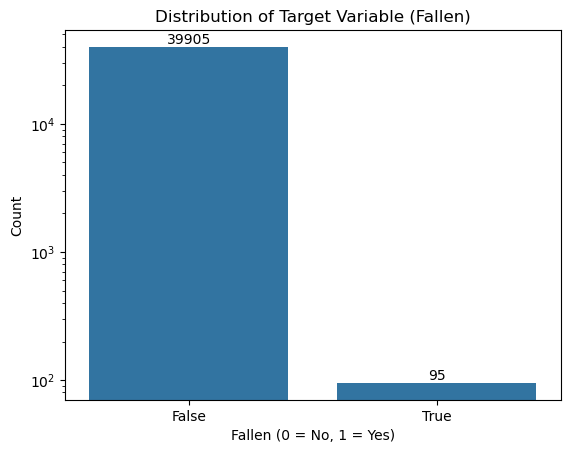

In [107]:
sns.countplot(data=df, x='fallen')
plt.title('Distribution of Target Variable (Fallen)')
plt.xlabel('Fallen (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Annotate the bars with their respective counts
for p in plt.gca().patches:
	count = int(p.get_height())
	plt.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
				 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
				 textcoords='offset points')

plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

In [108]:
print("Value distribution for 'fallen':")
print(df['fallen'].value_counts())
fall_counts = df['fallen'].value_counts(normalize=True) * 100
print("\nPercentage of Fall Incidents:\n", fall_counts.round(2))

Value distribution for 'fallen':
fallen
False    39905
True        95
Name: count, dtype: int64

Percentage of Fall Incidents:
 fallen
False    99.76
True      0.24
Name: proportion, dtype: float64


#### CHECK MISSING VALUES

In [109]:
# Calculate missing values and percentages for all columns
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

# Create a DataFrame for the summary
missing_summary = pd.DataFrame({
	'Missing Values': missing,
	'Percentage': missing_percentage.round(2)
}).sort_values(by='Percentage', ascending=False)

# Display the summary
print("\nMissing Values per Column:\n", missing_summary)


Missing Values per Column:
                                                   Missing Values  Percentage
medical_items-skin_condition_at_item_application           38637       96.59
fall-how_many_last_12_month                                38600       96.50
bed_mobility-skin_condition                                38447       96.12
bed_mobility-jones                                         37593       93.98
fall-while_stay                                            37212       93.03
transfer                                                   36994       92.48
walk-jones                                                 35627       89.07
decubitus-at_the_moment                                    30401       76.00
psychotropic_or_sedatives_drugs                            30203       75.51
cognition-impairment                                       29957       74.89
diseases                                                   29956       74.89
excretions-impairment                          

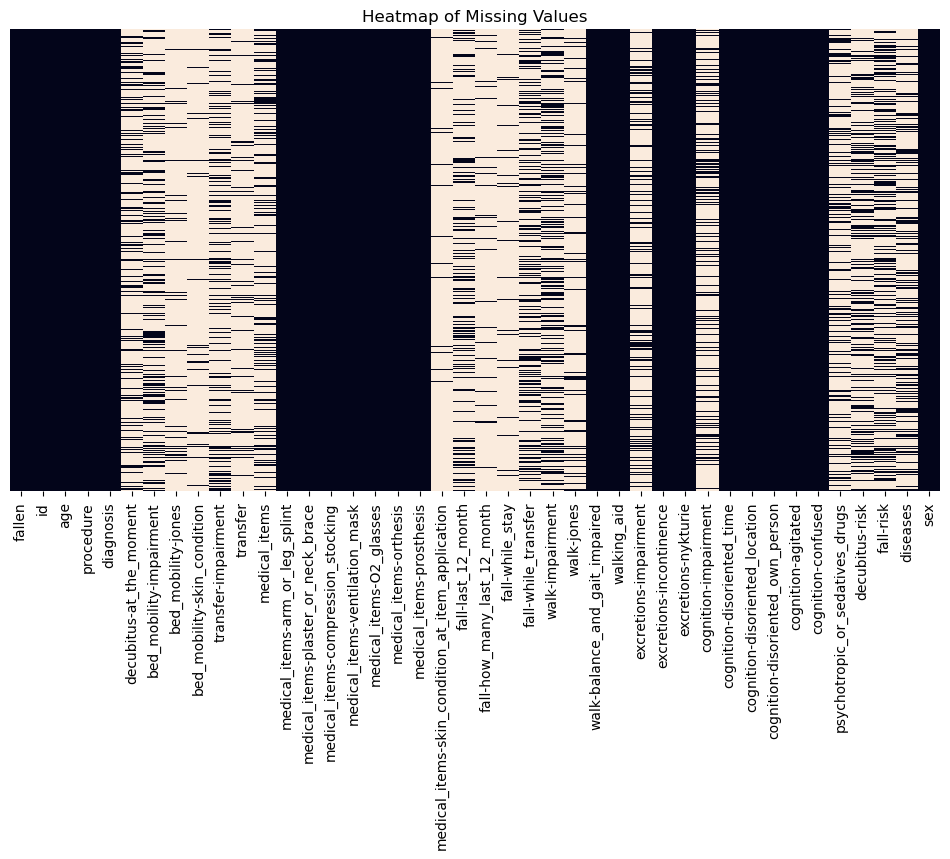

In [110]:
# Visualizing missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

We see here that the missing data does not follow any obvious patterns. This is going to us makeing decisions later on how to impute those missing data.

### Handling missing data

From the provided explanations, we have the following columns to consider:
  - Columns with 0 missing values (fully recorded).
  - Logical columns with high missingness => means "not assessed" or "unknown".
  - Jones score columns, 'decubitus-risk' and 'fall-risk' (character) with values {0, +, ++} that hold ordinal values

#### Logical Columns with missing data

### Categorize Boolean Variable & Handle Missing Data

Upon examination, some features are recognized automatically as `object`.
We did further inspection to determine if the data types are properly assigned.
We determined the features that should be encoded as `bool` and convert them accoringly.

In [112]:
bool_vars = [
    "decubitus-at_the_moment",
    "bed_mobility-impairment",
    "bed_mobility-skin_condition",
    "transfer-impairment",
    "medical_items",
    "medical_items-skin_condition_at_item_application",
    "fall-last_12_month",
    "fall-while_stay",
    "fall-while_transfer",
    "walk-impairment",
    "excretions-impairment",
    "cognition-impairment",
    "psychotropic_or_sedatives_drugs",
    "diseases"
]

df[bool_vars] = df[bool_vars].astype("boolean")

In [113]:
# List of boolean/categorical columns that need NaN imputation and dummy encoding
columns_to_encode = [
    "fall-while_stay", "transfer-impairment", "bed_mobility-impairment", 
    "excretions-impairment", "cognition-impairment", "walk-impairment", 
    "fall-while_transfer", "fall-last_12_month", "medical_items-skin_condition_at_item_application", 
    "medical_items", "bed_mobility-skin_condition", "decubitus-at_the_moment", "psychotropic_or_sedatives_drugs", "diseases", "sex"
]

# Fill NaNs with "Unknown" and convert to categorical type
df[columns_to_encode] = df[columns_to_encode].astype("object").fillna("Unknown")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)


#### Handle numerical Variables with Missing Data

The only numerical variable with missing data is "fall-how_many_last_12_month". In out final approach, we just left the variable unimputed because it yielded the best result. We show the other imputation strategies we employed:

- imputation with missingness indicator

- imputation with hot-deck 

In [34]:
# Create a missing indicator for "fall-how_many_last_12_month"
df["fall-how_many_last_12_month_missing"] = df["fall-how_many_last_12_month"].isna()

#### Hot Deck Encoding

Lets look at the distribution of the variable to check if hot-deck imputation makes sense.

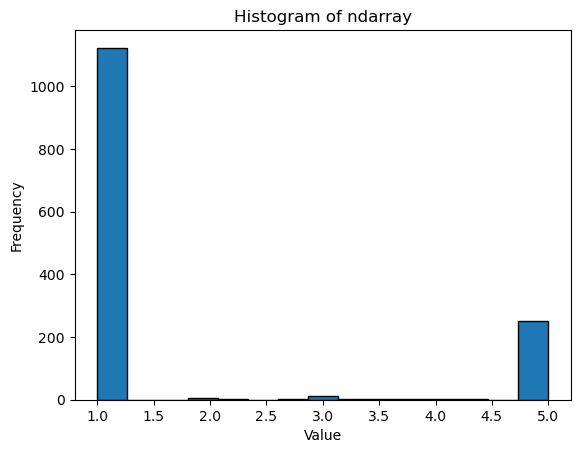

In [114]:
plt.hist(df["fall-how_many_last_12_month"], bins=15, edgecolor='black')  # Increase bins for finer granularity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ndarray")
plt.show()

In [ ]:
# Step 1: Copy the column to a new column
df['fall_scrambled'] = df['fall-how_many_last_12_month'].copy()

# Step 2: Remove missing values and randomly shuffle the column
non_missing_values = df['fall_scrambled'].dropna().sample(frac=1, random_state=42).values  # Shuffle

# Step 3: Replicate values so that there are as many as needed
num_missing = df['fall-how_many_last_12_month'].isna().sum()
replicated_values = np.tile(non_missing_values, (num_missing // len(non_missing_values) + 1))[:num_missing]

# Step 4: Join the scrambled column with the original DataFrame
df.loc[df['fall-how_many_last_12_month'].isna(), 'fall-how_many_last_12_month'] = replicated_values

# Step 5: Drop the scrambled column (optional)
df.drop(columns=['fall_scrambled'], inplace=True)

# Check if missing values are imputed
print(df['fall-how_many_last_12_month'].isna().sum())  # Should be 0 if all NaNs were filled

0


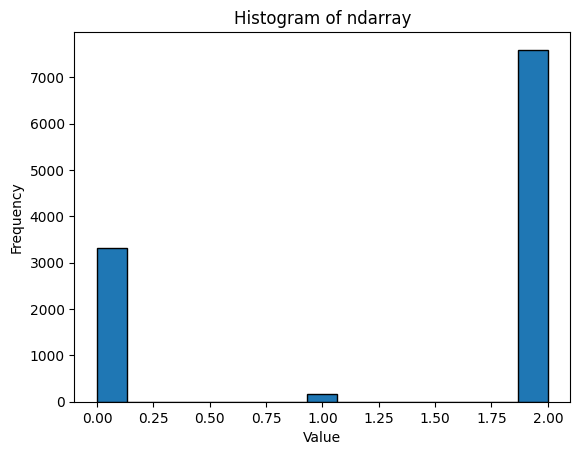

In [ ]:
plt.hist(df["fall-risk"], bins=15, edgecolor='black')  # Increase bins for finer granularity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ndarray")
plt.show()

As we can see the hot deck-imputation worked.

Both the imputation strategies were tested using the evaluation pipeline further down below but did not lead to an improvement. Since the final model can handle missing data it is left unimputed.

#### Ordinal Variables

The variables down below can be imputed with an OrdinalEncoder or with one-hot encoding.

In [ ]:
df["transfer"] = OrdinalEncoder().fit_transform(df[["transfer"]])
df["bed_mobility-jones"] = OrdinalEncoder().fit_transform(df[["bed_mobility-jones"]])
df["decubitus-risk"] = OrdinalEncoder().fit_transform(df[["decubitus-risk"]])
df["fall-risk"] = OrdinalEncoder().fit_transform(df[["fall-risk"]])
df["walk-jones"] = OrdinalEncoder().fit_transform(df[["walk-jones"]])

Again both approaches were tested and we decided for the one-hot encoding since this approach yielded better results.

The reason for this is obvious by looking at some crosstabs.

In [36]:
ct = pd.crosstab(df['fall-risk'], df['fallen'])
print(ct)

fallen     False  True 
fall-risk              
+           3590     95
++           197      0
0           8446      0


In [37]:
ct = pd.crosstab(df['walk-jones'], df['fallen'])
print(ct)

fallen      False  True 
walk-jones              
1             454     31
2            3082      3
3             475     12
4A            233     10
4B             70      3


It is obvious from these crosstabs that the variables are actually not ordinal, i.e. a classification with higher jones score/risk profile does not lead to more falls!

One-hot encoding for the supposedly ordinal variables

In [116]:
columns_to_encode = ["transfer", "bed_mobility-jones", "walk-jones", "decubitus-risk", "fall-risk"]

# Fill NaNs with "Unknown"
df[columns_to_encode] = df[columns_to_encode].fillna("Unknown")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)

In [117]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,walk-jones_4B,walk-jones_Unknown,decubitus-risk_+,decubitus-risk_++,decubitus-risk_0,decubitus-risk_Unknown,fall-risk_+,fall-risk_++,fall-risk_0,fall-risk_Unknown
0,False,179020,39,0,S250,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,112009,29,0,M418,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,False,54403,29,9-26,S910,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,False,13054,64,8-77,M400,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,False,45770,89,8-93,K630,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


### Handle Procedure and Diagnosis Columns

Quick note on those columns: We have spent some time thinking about how to handle those. It seems unsuitable to try to completely one-hot encode them since this will yield to an extremely dataset. Even dimensionality reduction techniques won`t help them. We therefore decided to bin both the columns. This makes sense since both the ICD-10 and OPS codes give their broad catgegory by their first digit or their first letter. The rest of the digits give more detailed information that is unlikely to carry meaningful information on its own. It is therefore better to just look at the broader categories. For example ICD-10 code 6 gives infromation on whether the patient received medication, a very interesting column to look at.

In [118]:
df["procedure_category"] = df["procedure"].apply(lambda x: x if x == "0" else x.split("-")[0])
df_dummies = pd.get_dummies(df["procedure_category"], prefix="procedure_category")
# # Combine with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [119]:
# Extract the first letter (ICD-10 chapter)
df["ICD10_category"] = df["diagnosis"].str[0]
# One-hot encode the categories
df_dummies = pd.get_dummies(df["ICD10_category"], prefix="ICD10")
# Combine with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [120]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,ICD10_Q,ICD10_R,ICD10_S,ICD10_T,ICD10_U,ICD10_V,ICD10_W,ICD10_X,ICD10_Y,ICD10_Z
0,False,179020,39,0,S250,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,112009,29,0,M418,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,54403,29,9-26,S910,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,13054,64,8-77,M400,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,45770,89,8-93,K630,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Notes: 
- Ranking the probability of patient's fall (e.g. high risk, etc.) might be enough instead of assigning individual patient's fall/non-fall value.
- Missing nursing data is not MCAR -> dummy variables for unknown values might be a good predictors

## Outlier detection

In [121]:
numerical_vars = ["age", "fall-how_many_last_12_month"]

In [122]:
def tukey_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Example for all numerical vars:
outlier_flags_tukey = pd.DataFrame()
for col in numerical_vars:
    outlier_flags_tukey[col] = tukey_outliers(df[col])

# Summary
print("Tukey Outliers Count:")
print(outlier_flags_tukey.sum().sort_values(ascending=False))

Tukey Outliers Count:
fall-how_many_last_12_month    278
age                              0
dtype: int64


In [123]:
df["fall-how_many_last_12_month"].value_counts()

fall-how_many_last_12_month
1.000000    1122
5.000000     249
3.000000      11
2.000000       3
3.392226       1
2.748724       1
4.931584       1
3.100813       1
3.871862       1
3.659762       1
2.981188       1
1.257659       1
3.241220       1
4.396037       1
4.096168       1
2.013521       1
2.202339       1
4.453497       1
4.175363       1
Name: count, dtype: int64

Even though Tukey fence did identify outliers for "fall-how_many_last_12_month" after manual inspection shows that all the values in reality are realistic. The reason is simply that exactly one fall already entails so many isntances that every other value is deemed an outlier.

### Partitioning

We decided to split the data is training/test/validation. We wont test the validation dataset until the very end since we are always evaluating and tuning based on the test set.

In [124]:
# Split into train (80%) and test (20%)
df, val_df = train_test_split(df, test_size=0.1, stratify=df["fallen"], random_state=42)

# Section 2: Data Exploration and Relationships

We are going to compute the numerical variables with pearson correlation.

In [125]:
df['age'].corr(df['fallen'], method='pearson')

0.06165066620933592

In [126]:
df['fall-how_many_last_12_month'].corr(df['fallen'], method='pearson')

0.21530210766180036

#### Binary Variables will be computed with Phi-Coefficient correlation

In [130]:
def phi_coefficient(df, var, target="fallen"):
    contingency_table = pd.crosstab(df[var], df[target])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = df.shape[0]
    return np.sqrt(chi2 / n)

binary_vars = [col for col in df.columns if df[col].nunique() == 2]  # Identify binary columns
phi_corrs = {var: phi_coefficient(df, var) for var in binary_vars}

# Sort by absolute correlation value
sorted_phi_corrs = sorted(phi_corrs.items(), key=lambda x: abs(x[1]), reverse=True)

In [56]:
print(sorted_phi_corrs[:20])

[('fallen', 0.9941721243642759), ('fall-while_stay_True', 0.2634207297731874), ('walk-balance_and_gait_impaired', 0.25508629573547126), ('excretions-incontinence', 0.16657173589736549), ('walk-impairment_True', 0.16403105082306563), ('fall-while_transfer_True', 0.16000152185274139), ('transfer-impairment_True', 0.15392370855740098), ('fall-risk_+', 0.1528247063196303), ('excretions-impairment_True', 0.14948255943037683), ('walk-jones_1', 0.14407380901396077), ('cognition-impairment_True', 0.13988325724877987), ('bed_mobility-impairment_True', 0.13288755740844155), ('cognition-agitated', 0.11322515242741778), ('fall-last_12_month_True', 0.1068224280522789), ('walking_aid', 0.09615616085690859), ('decubitus-risk_+', 0.09507166412594281), ('cognition-disoriented_time', 0.08118758623510328), ('walk-jones_Unknown', 0.08043428269262108), ('walk-impairment_Unknown', 0.07355083386598443), ('fall-risk_Unknown', 0.07279009629345312)]


### Visualizations

C:\Users\felix\AppData\Local\Temp\ipykernel_22044\1886993880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["fallen"], y=df["age"], palette="coolwarm")


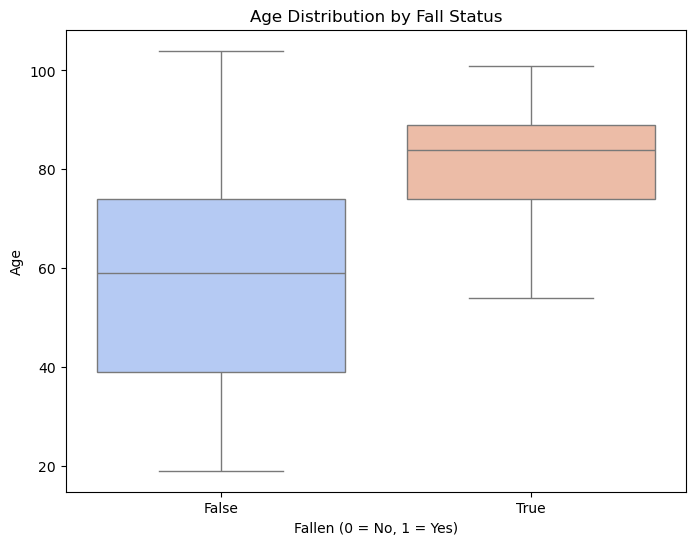

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["fallen"], y=df["age"], palette="coolwarm")
plt.xlabel("Fallen (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age Distribution by Fall Status")
plt.show()


There seems to be a significant of impact of age on fallen.

C:\Users\felix\AppData\Local\Temp\ipykernel_22044\97186582.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_viz.groupby('age_group')['fall-risk_+'].value_counts().unstack()


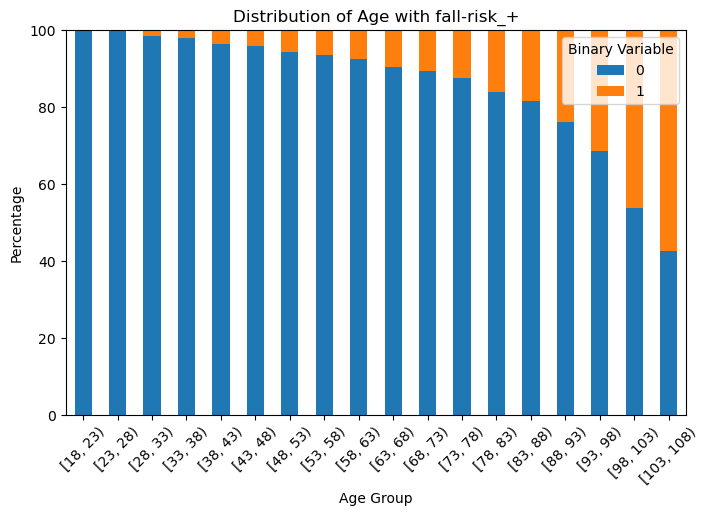

In [57]:
df_viz = df.copy()

# Define age bins
age_bins = range(18, 110, 5)  # 18-27, 28-37, ..., 78-84
df_viz['age_group'] = pd.cut(df_viz['age'], bins=age_bins, right=False)

# Count occurrences of 0 and 1 per age group
age_counts = df_viz.groupby('age_group')['fall-risk_+'].value_counts().unstack()

# Normalize to percentages
age_percent = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
age_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Labels and customization
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Distribution of Age with fall-risk_+")
plt.legend(["0", "1"], title="Binary Variable")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()

Age and fall_risk_+ are highly correlated. This is depicted better than by computing a correlation score (which can be tricky between cont. and bin varaibles, especially if skewed).

C:\Users\felix\AppData\Local\Temp\ipykernel_22044\2492159077.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_viz.groupby('age_group')['walk-balance_and_gait_impaired'].value_counts().unstack()


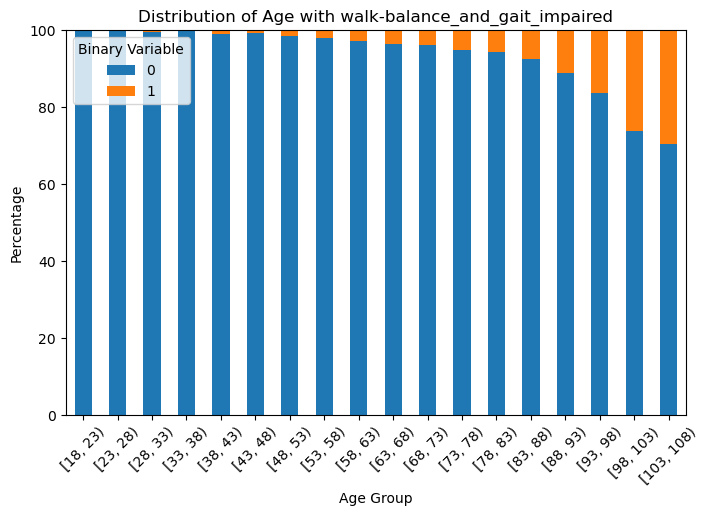

In [58]:
df_viz = df.copy()

# Define age bins
age_bins = range(18, 110, 5)  # 18-27, 28-37, ..., 78-84
df_viz['age_group'] = pd.cut(df_viz['age'], bins=age_bins, right=False)

# Count occurrences of 0 and 1 per age group
age_counts = df_viz.groupby('age_group')['walk-balance_and_gait_impaired'].value_counts().unstack()

# Normalize to percentages
age_percent = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
age_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Labels and customization
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Distribution of Age with walk-balance_and_gait_impaired")
plt.legend(["0", "1"], title="Binary Variable")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()

Rising Age also is correlated with increasing walk and balance and gait impairment, one of the strongest predictors for patient falls.

Other visualizations will less meaningful variables are left out here.

In [127]:
df_backup = df.copy()

In [133]:
binary_vars.remove("fallen")

In [134]:
print(binary_vars)

['medical_items-arm_or_leg_splint', 'medical_items-plaster_or_neck_brace', 'medical_items-compression_stocking', 'medical_items-ventilation_mask', 'medical_items-O2_glasses', 'medical_items-orthesis', 'medical_items-prosthesis', 'walk-balance_and_gait_impaired', 'walking_aid', 'excretions-incontinence', 'excretions-nykturie', 'cognition-disoriented_time', 'cognition-disoriented_location', 'cognition-disoriented_own_person', 'cognition-agitated', 'cognition-confused', 'fall-while_stay_False', 'fall-while_stay_True', 'fall-while_stay_Unknown', 'transfer-impairment_False', 'transfer-impairment_True', 'transfer-impairment_Unknown', 'bed_mobility-impairment_False', 'bed_mobility-impairment_True', 'bed_mobility-impairment_Unknown', 'excretions-impairment_False', 'excretions-impairment_True', 'excretions-impairment_Unknown', 'cognition-impairment_False', 'cognition-impairment_True', 'cognition-impairment_Unknown', 'walk-impairment_False', 'walk-impairment_True', 'walk-impairment_Unknown', 'fa

### Feature Engineering Through PCA & MCA

In [136]:
# Subset the dataframe to only binary variables
df_mca = df[binary_vars]

# Perform MCA
mca = prince.MCA(n_components=3, random_state=42)
mca = mca.fit(df_mca)

# Transform data to get the new MCs
df_mcs = mca.transform(df_mca)
df_mcs.columns = ["MC1", "MC2", "MC3"]  # Naming first three MCs

In [137]:
df_mcs

,MC1,MC2,MC3
6690,-0.102483,0.028141,0.063260
35722,-0.090636,0.015409,-0.001125
32809,-0.100046,0.039487,0.100269
10660,-0.107097,0.040684,-0.093219
33450,-0.059926,-0.000051,-0.083738
...,...,...,...
8241,-0.061710,0.075780,0.140927
33347,-0.117085,0.039454,0.028637
16947,-0.048441,0.022424,0.000661
7614,-0.070298,0.020731,-0.027680


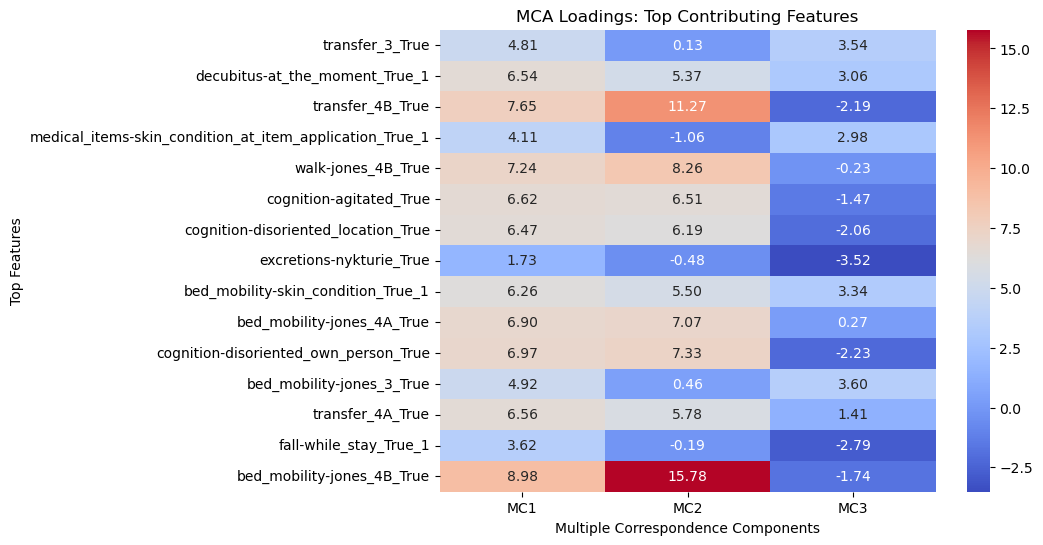

In [138]:
# Get loadings (column coordinates)
loadings = mca.column_coordinates(df_mca)

# Compute absolute values of loadings to measure contribution strength
abs_loadings = loadings.abs()

# Select top 7 features for each of the first three MCs
top_features = set()
for i in range(3):  # Loop over MC1, MC2, MC3
    top_features.update(abs_loadings.iloc[:, i].nlargest(7).index)

# Filter loadings to only include selected top features
loadings_filtered = loadings.loc[list(top_features), :3]
loadings_filtered.columns = ["MC1", "MC2", "MC3"]

# Plot the refined heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_filtered, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("MCA Loadings: Top Contributing Features")
plt.xlabel("Multiple Correspondence Components")
plt.ylabel("Top Features")
plt.show()

All of the MCs are quite different in their loadings. MC2 stands out with very high loadings from bed_mobility_jones with a score of 4B and trensfers with a score of 4B. We are going to include these MCs in predictions later on.

In [139]:
df = pd.concat([df, df_mcs], axis=1)

In [140]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,ICD10_T,ICD10_U,ICD10_V,ICD10_W,ICD10_X,ICD10_Y,ICD10_Z,MC1,MC2,MC3
6690,False,77363,49,0,G453,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.102483,0.028141,0.063260
35722,False,80749,34,1-10,A010,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.090636,0.015409,-0.001125
32809,False,23355,39,0,J110,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.100046,0.039487,0.100269
10660,False,36660,29,0,S100,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.107097,0.040684,-0.093219
33450,False,15012,54,8-92,L210,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.059926,-0.000051,-0.083738


# Section 3 Modeling

We are going to employ a Logistic Regression. LogOdds for interpretation.

In [143]:
df["fall-how_many_last_12_month"] = df["fall-how_many_last_12_month"].fillna(df["fall-how_many_last_12_month"].mean())

Recall: 0.15


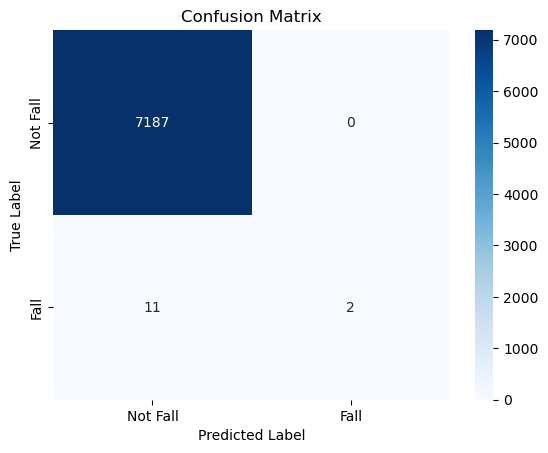

AUPRC: 0.25


In [146]:
# === Load Data ===
X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
y = df["fallen"]  # Target 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = recall_score(y_test, y_pred)
print(f"Recall: {accuracy:.2f}")

# === Step 8: Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)  # Use y_test instead of y
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate Precision-Recall curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_probs)
auprc = auc(recall, precision)

print(f"AUPRC: {auprc:.2f}")


# Section 1: Data Overview & Preparation

## Summary of dataset
- Autoviz
- Histogram
- df.describe()




## Outliers
Question: Regarding outliers in the dataset (not found until now)?

# Section 2: Data Exploration & Relationships

## Correlation analytics
- Heatmap
- Rule mining: Attecendent -> Consequence



## Visualization of meaningful insights
- Plotting age group -> Fall (depends on the previous result)

## Feature engineering
- Summarize various features/columns that are connected to each other -> Possibly stronger prediction

# Section 3: Model Development

## Logistic Regression (simple model)

## Neural Network (complex model)

# Section 4: Model Evaluation & Interpretation

## Strength & Weakness
- Parameters that influence the prediction result

## Stakeholder etc.
- Which model is preferable in which scenario/for which stakeholder


## Actionable insights